## This is the Code Workbook to classifiy the MNIST FASHION Dataset using Tensorflow

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


We are directly importing the data from the Keras API 

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_data, training_label), (testing_data, testing_label) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We will be Now experimenting with the data and looking at one of the image in the dataset

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

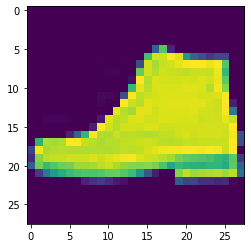

In [16]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth = 200)                                  ### We did this to increase the range of output line while looking at  the numpy array of the image.
plt.imshow(training_data[42])
print(training_data[42])
print(training_label[42])

Now we notice that all of the values in the number are between 0-255. If we are training a neural network , for better performance and less overfitting we use the normalized values. Lets normalize our pixel values using python broadcasting.

In [8]:
training_data = training_data/ 255.0
testing_data = testing_data/255.0


Now, we know why there are twos sets of data, one is for  training the network and another one is to test the network performance on an unseen data.

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

The next thing to do after you have created your model is to compile it , build it using **optimizer** and **loss_function** and then we can simply pass our data to the model to train it and get the trained parameters, for predicting the output.

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy') # Here we choose the Adam Optimizer and sparse categorical Crossentropy loss function that goes with softmax activation function

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.fit(training_data, training_label, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4934
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3698
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3295
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3082
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2915


Now we just trained the the neural network with the training set for 5 epochs. Now we will evaluate the model using the **.evaluate** method.

In [13]:
model.evaluate(testing_data, testing_label)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3438


0.3437511408805847

### Now We got the testing error of 0.343 which is 66% accuracy, which is not that great. because the data was unseen.

## Introducing Callbacks in Keras to stop the training when reached a desired result: 
## **This is super cool lets learn it.**

In [17]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [26]:
## introducing the Callbacks class implementing the callbacks from keras.

class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.25):
      print("\nReached the Accuracy of 60% , so cancelling the training further!!!")
      self.model.stop_training = True         ## The most important line for cancelling the training further.
callbacks = myCallbacks()

In [27]:
dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()
train_images = train_images/255.0
test_images = test_images/255.0

model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')            ##### You can also add metrics in the compile  code and then can use it for te callbacks in the training time.
model.fit(train_images, train_labels, epochs = 5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4713
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3564
Epoch 3/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3232
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2978
Epoch 5/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2826


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  401920    
_________________________________________________________________
dense_5 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


True